**Aluno:** Ramon Pereira Vilela

In [5]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [6]:
# setup security 
access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

# setup file store
file = 'C:\\Material_Ramon_2\\Pos_Graduacao\\PUC MINAS\\Ciência de Dados e Big Data\Módulo 14 - Recuperação da Informação na Web e em Redes Sociais\\tweets-sample-3.json'

In [7]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [5]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 30 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['neymar', 'lukaku', 'messi', 'modric', 'mbappe','pogba','rakitic','cr7','hazard', 'kante', 'kane'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [10]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   en  @TeamCRonaldo I love Cristiano. And I'm a Mess...    None
1   en  RT @TheManUtdWay: Other footballers bring thei...    None
2   ht  RT @ActuFoot_: Deschamps\nLloris\nMandanda\nAr...    None
3   en  RT @brfootball: Luka Modric joins the Golden B...    None
4   en                  Love this https://t.co/zcamoyqtZh    None
5   en  RT @FootballVines: Mbappé walking into the PSG...    None
6   fr  RT @sarahmghr: MERCI DESCHAMPS\nMERCI GRIEZMAN...    None
7   es  RT @ivan_2511: Lo más triste es que Mbappe con...    None
8   ht  RT @ZombiaxX: Non mais Griezmann qui coupe Pau...    None
9   en  RT @MasAbukar: Pogba when he’s back with Manch...    None


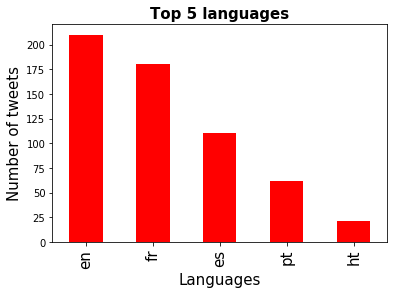

In [11]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

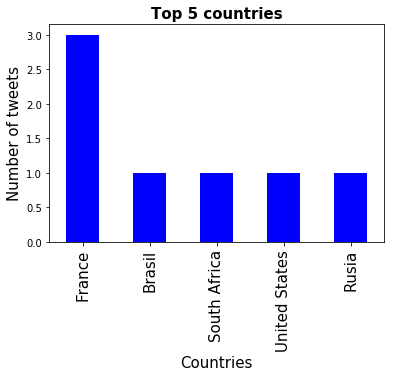

In [12]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [13]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [14]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('neymar', tweet['text']):
            players.append('neymar')
        elif word_in_text('messi', tweet['text']):
            players.append('messi')
        elif word_in_text('lukaku', tweet['text']):
            players.append('lukaku')
        elif word_in_text('modric', tweet['text']):
            players.append('modric')
        elif word_in_text('hazard', tweet['text']):
            players.append('hazard')
        elif word_in_text('mbappe', tweet['text']):
            players.append('mbappe')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('pogba', tweet['text']):
            players.append('pogba')
        elif word_in_text('rakitic', tweet['text']):
            players.append('rakitic')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('kante', tweet['text']):
            players.append('kante')
        elif word_in_text('kane', tweet['text']):
            players.append('kane')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,en,@TeamCRonaldo I love Cristiano. And I'm a Mess...,None,messi
1,en,RT @TheManUtdWay: Other footballers bring thei...,None,pogba
2,ht,RT @ActuFoot_: Deschamps\nLloris\nMandanda\nAr...,None,pogba
3,en,RT @brfootball: Luka Modric joins the Golden B...,None,modric
4,en,Love this https://t.co/zcamoyqtZh,None,None
5,en,RT @FootballVines: Mbappé walking into the PSG...,None,neymar
6,fr,RT @sarahmghr: MERCI DESCHAMPS\nMERCI GRIEZMAN...,None,pogba
7,es,RT @ivan_2511: Lo más triste es que Mbappe con...,None,mbappe
8,ht,RT @ZombiaxX: Non mais Griezmann qui coupe Pau...,None,pogba
9,en,RT @MasAbukar: Pogba when he’s back with Manch...,None,pogba


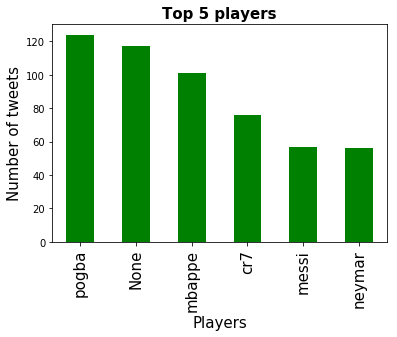

In [15]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')

In [ ]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português
